In [1]:
import nltk

In [2]:
import re

In [3]:
re.findall("[a-z]","$34.33 cash.")

['c', 'a', 's', 'h']

In [4]:
re.findall("(name|phone):","My name:Joe,my phone: (312)555-1212")

['name', 'phone']

In [5]:
re.findall("([Ll]ion)s?","Give it to the Lions or the lion.")

['Lion', 'lion']

In [6]:
re.sub("[a-z]","x","Hey.I know this regex stuff...")

'Hxx.I xxxx xxxx xxxxx xxxxx...'

In [10]:
# Text processing

nltk.download('gutenberg')
print("gutenberg book ids",nltk.corpus.gutenberg.fileids())

gutenberg book ids ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\VenkyTheGreat\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [11]:
alice = nltk.corpus.gutenberg.words("carroll-alice.txt")
print("len(alice)-",len(alice))
print(alice[:100])

len(alice)- 34110
['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',']


In [14]:
nltk.download('webtext')
grail = nltk.corpus.webtext.words("grail.txt")
print("len(grail)-",len(grail))
print(grail[:100])

len(grail)- 16967
['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']', 'KING', 'ARTHUR', ':', 'Whoa', 'there', '!', '[', 'clop', 'clop', 'clop', ']', 'SOLDIER', '#', '1', ':', 'Halt', '!', 'Who', 'goes', 'there', '?', 'ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.', 'King', 'of', 'the', 'Britons', ',', 'defeator', 'of', 'the', 'Saxons', ',', 'sovereign', 'of', 'all', 'England', '!', 'SOLDIER', '#', '1', ':', 'Pull', 'the', 'other', 'one', '!', 'ARTHUR', ':', 'I', 'am', ',', '...', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'Patsy', '.', 'We', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in']


[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\VenkyTheGreat\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


In [15]:
# Plain text Extraction
# maxmatch algorithm

def tokenize(str,dict):
    s=0
    words = []
    
    while(s < len(str)):
        found = False
        
        # find biggest word in dict that matches str
        for word in dict:
            lw = len(word)
            if(str[s:s+lw] == word):
                words.append(word)
                s += lw
                found = True
                break
        if (not found):
            words.append(str[s])
            s += 1
            
    print(words)
    #return words
    
# small dictionary of known words, longest words first
dict = ["before","table","theta","after","where","there","bled","said","lead","man","her","own","the","ran","it"]

# this algorithm designed to work with languages that don't have whitespace characters
# so simulate that in our test
tokenize("themanranafterit",dict)   #works
tokenize("thetabledownthere",dict)  #fails



['the', 'man', 'ran', 'after', 'it']
['theta', 'bled', 'own', 'there']


In [18]:
nltk.download('punkt')
nltk.word_tokenize("the man,he ran after it's $3.23 dog on 03/23/2016.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VenkyTheGreat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['the',
 'man',
 ',',
 'he',
 'ran',
 'after',
 'it',
 "'s",
 '$',
 '3.23',
 'dog',
 'on',
 '03/23/2016',
 '.']

In [19]:
nltk.sent_tokenize('The man ran after it. The table down there? Yes, down there!')

['The man ran after it.', 'The table down there?', 'Yes, down there!']

In [20]:
# Stop word removal

stoppers = "a is of the this".split()

def removeStopwords(stopwords,txt):
    newtxt = ' '.join([word for word in txt.split() if word not in stopwords])
    return newtxt

removeStopwords(stoppers, "this is a step of the stop word removal code.")

'step stop word removal code.'

In [21]:
# NLTK example for stopwards removal

from nltk.corpus import stopwords
stops = stopwords.words("English")
print("len(stops)=",len(stops))
removeStopwords(stops, "this is a test of the stop word removal code.")


len(stops)= 179


'test stop word removal code.'

In [22]:
# Case removal 

str = 'The man ran after it. The table down there? Yes, down there!'
str.lower()


'the man ran after it. the table down there? yes, down there!'

In [23]:
# NLTK stemming
def stem_with_porter(words):
    porter = nltk.PorterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words

def stem_with_lancaster(words):
    porter = nltk.LancasterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words

str = "Please don't unbuckle your seat-belt while I am driving, he said"

print("porter:",stem_with_porter(str.split()))
print()
print("lancaster:", stem_with_lancaster(str.split()))


porter: ['pleas', "don't", 'unbuckl', 'your', 'seat-belt', 'while', 'I', 'am', 'driving,', 'he', 'said']

lancaster: ['pleas', "don't", 'unbuckl', 'yo', 'seat-belt', 'whil', 'i', 'am', 'driving,', 'he', 'said']


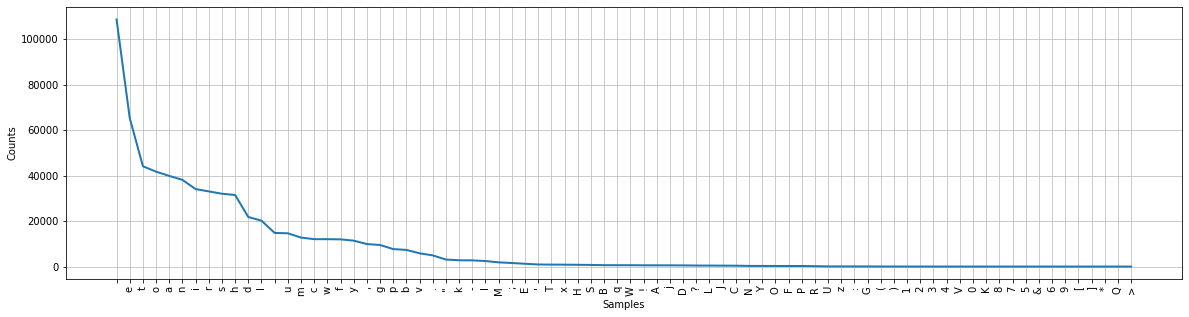

In [25]:
# Text Exploration
# frequency analysis

from nltk.corpus import gutenberg
from nltk.probability import FreqDist

raw = gutenberg.raw("austen-sense.txt")
fd_letters = FreqDist(raw)

words = gutenberg.words("austen-sense.txt")
fd_words = FreqDist(words)
sas = nltk.Text(words)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

# letters from SAS
fd_letters.plot(100)


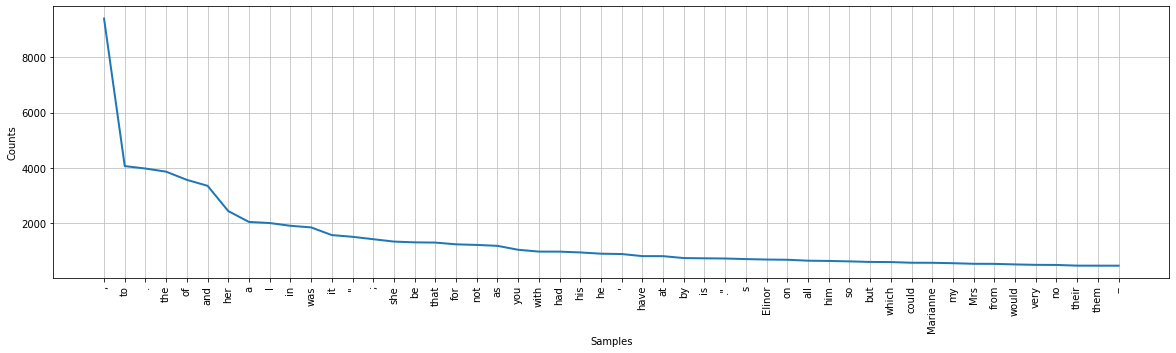

In [26]:
# freq dist plot

import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))

# frequency plot for words from SAS
fd_words.plot(50)


In [36]:
words = gutenberg.words("austen-sense.txt")
fd_words = FreqDist(words)
sas = nltk.Text(words)
sas.collocations


<bound method Text.collocations of <Text: Sense and Sensibility by Jane Austen 1811>>

In [37]:
longWords = [w for w in set(words) if len(w)>13]
longWords[:15]


['circumspection',
 'misapprehension',
 'misconstruction',
 'unpleasantness',
 'representation',
 'disinclination',
 'dissatisfaction',
 'acknowledgments',
 'unintelligible',
 'insignificance',
 'inconsiderately',
 'demonstrations',
 'accomplishment',
 'irreproachable',
 'companionableness']

In [38]:
sas.concordance("affectionately")
print()

sas.concordance("correspondence")
print()

sas.concordance("dare")
print()


Displaying 2 of 2 matches:
before . She took them all most affectionately by the hand , and expressed gre
ed , took her hand , kissed her affectionately several times , and then gave w

Displaying 4 of 4 matches:
ould not be maintained if their correspondence were to pass through Sir John '
ve been Edward ' s gift ; but a correspondence between them by letter , could 
she had no doubt , and of their correspondence she was not astonished to hear 
e of Edward afforded her by the correspondence , for his name was not even men

Displaying 25 of 36 matches:
 not know what he was talking of , I dare say ; ten to one but he was light - 
l . The assistance he thought of , I dare say , was only such as might be reas
g , if I have plenty of money , as I dare say I shall , we may think about bui
, you will make conquests enough , I dare say , one way or other . Poor Brando
e . He is the curate of the parish I dare say ." " No , THAT he is not . He is
m . He was afraid of catching cold I dare say 

In [39]:
sas.similar("affection")

attention time regard mother love heart opinion sister wishes wife
arrival marianne kindness family it marriage sisters sake conduct mind


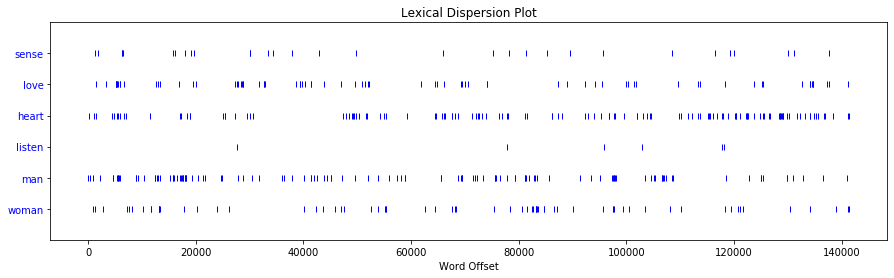

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
sas.dispersion_plot(["sense", "love", "heart", "listen", "man", "woman"])


In [3]:
# Hidden Markov models
# states
start = -1; cold = 0; normal = 1; hot = 2; stateCount = 3
stateNames = ["cold", "normal", "hot"]

# outputs
hotChoc = 0; soda = 1; iceCream = 2
timeSteps = 7

# State transition probabilities
trans = {}
trans[(start,cold)] = .1
trans[(start,normal)] = .8
trans[(start,hot)] = .1

trans[(cold,cold)] = .7
trans[(cold, normal)] = .1
trans[(cold, hot)] = .2

trans[(normal,cold)] = .3
trans[(normal,normal)] = .4
trans[(normal,hot)] = .3

trans[(hot,cold)] = .2
trans[(hot,normal)] = .4
trans[(hot,hot)] = .4

# state outputs
output = {}
output[(cold,hotChoc)] = .7
output[(cold,soda)] = .3
output[(cold, iceCream)] = 0

output[(normal,hotChoc)] = .1
output[(normal,soda)] = .7
output[(normal, iceCream)] = .2

output[(hot,hotChoc)] = 0
output[(hot,soda)] = .6
output[(hot, iceCream)] = .4

diary = [soda, soda, hotChoc, iceCream, soda, soda, iceCream]

# manage cell values and back pointers
cells = {}
backStates = {}

def computeMaxPrev(t,sNext):
    maxValue = 0
    maxState = 0
        
    for s in range(stateCount):
        value = cells[t,s] * trans[(s,sNext)]
        if(s == 0 or value > maxValue):
            maxValue = value
            maxState = s
            
    return (maxValue, maxState)

def viterbi(trans,output,diary):
        
        # special handling for t = 0 which have no prior states
        for s in range(stateCount):
            cells[(0,s)] = trans[(start,s)] * output[(s, diary[0])]
            
        # handle rest of time steps
        for t in range(1, timeSteps):
            for s in range(stateCount):
                maxValue,maxState = computeMaxPrev(t-1, s)
                backStates[(t,s)] = maxState
                cells[(t,s)] = maxValue * output[(s, diary[t])]
                #print("t=", t, "s=", s, "maxValue=", maxValue, "maxState=", maxState, "output=",output[(s, diary[t])])
                
        # walk thru cells backwards to get most probable path
        path = []
        
        for tt in range(timeSteps):
            t = timeSteps - tt - 1 # step t backwards over timesteps
            maxValue = 0
            maxState = 0
            
            for s in range (stateCount):
                value = cells[t,s]
                if (s==0 or value > maxValue):
                    maxValue = value
                    maxState = s
                    
            path.insert(0,maxState)
            
        return path

# test algorithm on weather problem
path = viterbi(trans,output,diary)

print("Weather by days:")
for i in range(timeSteps):
    state = path[i]
    print("day=", i+1, stateNames[state])
            



Weather by days:
day= 1 normal
day= 2 normal
day= 3 cold
day= 4 hot
day= 5 normal
day= 6 normal
day= 7 hot


In [6]:
# OK, here is HMM POS Tagger for this example

# states
start = -1; VB = 0; TO = 1; NN = 2; PPSS = 3; stateCount = 4
stateNames = ["VB","TO","NN","PPSS"]

# outputs
I = 0; WANT = 1; To=2; RACE=3
timeSteps = 4

# state transition probabilities
trans = {}
trans[(start,VB)] = .19
trans[(start,TO)] = .0043
trans[(start,NN)] = .041
trans[(start,PPSS)] = .067

trans[(VB,VB)] = .0038
trans[(VB,TO)] = .035
trans[(VB,NN)] = .047
trans[(VB,PPSS)] = .0070

trans[(TO,VB)] = .83
trans[(TO,TO)] = 0
trans[(TO,NN)] = .00047
trans[(TO,PPSS)] = 0

trans[(NN,VB)] = .0040
trans[(NN,TO)] = .016
trans[(NN,NN)] = .087
trans[(NN,PPSS)] = .0045

trans[(PPSS,VB)] = .23
trans[(PPSS,TO)] = .00079
trans[(PPSS,NN)] = .0012
trans[(PPSS,PPSS)] = .00014

# state outputs

output = {}
output[(VB,I)] = 0
output[(VB,WANT)] = .0093
output[(VB,To)] = 0
output[(VB,RACE)] = .00012

output[(TO,I)] = 0
output[(TO,WANT)] = 0
output[(TO,To)] = .99
output[(TO,RACE)] = 0

output[(NN,I)] = 0
output[(NN,WANT)] = .000054
output[(NN,To)] = 0
output[(NN,RACE)] = .00057

output[(PPSS,I)] = .37
output[(PPSS,WANT)] = 0
output[(PPSS,To)] = 0
output[(PPSS,RACE)] = 0

sentence = [I, WANT, To, RACE]
words = ["I", "WANT", "TO", "RACE"]

# manage cell values and back pointers
cells = {}
backStates = {}

def computeMaxPrev(t,sNext):
    maxValue = 0
    maxState = 0
        
    for s in range(stateCount):
        value = cells[t,s] * trans[(s,sNext)]
        if(s == 0 or value > maxValue):
            maxValue = value
            maxState = s
            
    return (maxValue, maxState)

def viterbi(trans,output,sentence):
        
        # special handling for t = 0 which have no prior states
        for s in range(stateCount):
            cells[(0,s)] = trans[(start,s)] * output[(s, sentence[0])]
            
        # handle rest of time steps
        for t in range(1, timeSteps):
            for s in range(stateCount):
                maxValue,maxState = computeMaxPrev(t-1, s)
                backStates[(t,s)] = maxState
                cells[(t,s)] = maxValue * output[(s, sentence[t])]
                #print("t=", t, "s=", s, "maxValue=", maxValue, "maxState=", maxState, "output=",output[(s, sentence[t])])
                
        # walk thru cells backwards to get most probable path
        path = []
        
        for tt in range(timeSteps):
            t = timeSteps - tt - 1 # step t backwards over timesteps
            maxValue = 0
            maxState = 0
            
            for s in range (stateCount):
                value = cells[t,s]
                if (s==0 or value > maxValue):
                    maxValue = value
                    maxState = s
                    
            path.insert(0,maxState)
            
        return path

# test our algorithm on the POS TAG data
path = viterbi(trans,output,sentence)

print("Tagged Sentence:")
for i in range(timeSteps):
    state = path[i]
    print("  word=", words[i], "\ttag=", stateNames[state])
            


Tagged Sentence:
  word= I 	tag= PPSS
  word= WANT 	tag= VB
  word= TO 	tag= TO
  word= RACE 	tag= VB


In [8]:
# Using NLTK POS Tagger
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag("they refuse to permit us to obtain the refuse permit".split())


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\VenkyTheGreat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('they', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [6]:
# Name Gender classifier

import nltk
nltk.download('names')

names = [(name,'male') for name in nltk.corpus.names.words("male.txt")]
names += [(name,'female') for name in nltk.corpus.names.words("female.txt")]

def extract_gender_features(name):
    name = name.lower()
    features = {}
    features["suffix"] = name[-1:]
    features["suffix2"] = name[-2:] if len(name) > 1 else name[0]
    features["suffix3"] = name[-3:] if len(name) > 2 else name[0]
    features["prefix"] = name[:1] 
    features["prefix2"] = name[:2] if len(name) > 1 else name[0]
    features["prefix3"] = name[:3] if len(name) > 2 else name[0]
    features["prefix4"] = name[:4] if len(name) > 3 else name[0]
    features["prefix5"] = name[:5] if len(name) > 4 else name[0]
    #features["wordlen"] = len(name)
    
    #for letter in "abcdefghijklmnopqrstuvwxyz":
    #  features[Letter + "-count"] = name.count(Letter)
    
    return features
data = [(extract_gender_features(name), gender) for (name,gender) in names]

import random
random.shuffle(data)

#print(data[:10])
#print()
#print(data[-10:])

dataCount = len(data)
trainCount = int(.8*dataCount)

trainData = data[:trainCount]
testData = data[trainCount:]
bayes = nltk.NaiveBayesClassifier.train(trainData)

def classify(name):
    label = bayes.classify(extract_gender_features(name))
    print("name=", name, "classified as=", label)
    
print("trainData accuracy=", nltk.classify.accuracy(bayes, trainData))
print("testData accuracy=", nltk.classify.accuracy(bayes, testData))

classify("david")
classify("susan")
classify("alex")

bayes.show_most_informative_features(25)


[nltk_data] Downloading package names to
[nltk_data]     C:\Users\VenkyTheGreat\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


trainData accuracy= 0.9228953579858379
testData accuracy= 0.8407803650094399
name= david classified as= male
name= susan classified as= female
name= alex classified as= male
Most Informative Features
                 suffix2 = 'na'           female : male   =     86.2 : 1.0
                 suffix2 = 'ia'           female : male   =     76.9 : 1.0
                 suffix2 = 'la'           female : male   =     63.3 : 1.0
                  suffix = 'k'              male : female =     34.4 : 1.0
                  suffix = 'a'            female : male   =     32.8 : 1.0
                 suffix2 = 'sa'           female : male   =     30.6 : 1.0
                 suffix2 = 'ta'           female : male   =     29.0 : 1.0
                 suffix2 = 'us'             male : female =     24.1 : 1.0
                 suffix2 = 'rt'             male : female =     22.6 : 1.0
                 suffix2 = 'ra'           female : male   =     22.5 : 1.0
                 suffix2 = 'rd'             male :

In [5]:
# print gender classifier errors so we can design new features to identify the cases
errors = []

for(name,label) in names:
    if bayes.classify(extract_gender_features(name)) != label:
        errors.append({"name": name, "label": label})
        
errors


[{'name': 'Abbey', 'label': 'male'},
 {'name': 'Abbie', 'label': 'male'},
 {'name': 'Abby', 'label': 'male'},
 {'name': 'Abdullah', 'label': 'male'},
 {'name': 'Abe', 'label': 'male'},
 {'name': 'Ace', 'label': 'male'},
 {'name': 'Addie', 'label': 'male'},
 {'name': 'Aditya', 'label': 'male'},
 {'name': 'Adlai', 'label': 'male'},
 {'name': 'Adolph', 'label': 'male'},
 {'name': 'Adolphe', 'label': 'male'},
 {'name': 'Aguste', 'label': 'male'},
 {'name': 'Ajai', 'label': 'male'},
 {'name': 'Ajay', 'label': 'male'},
 {'name': 'Alaa', 'label': 'male'},
 {'name': 'Aldrich', 'label': 'male'},
 {'name': 'Alexei', 'label': 'male'},
 {'name': 'Alfie', 'label': 'male'},
 {'name': 'Alfonse', 'label': 'male'},
 {'name': 'Ali', 'label': 'male'},
 {'name': 'Allah', 'label': 'male'},
 {'name': 'Alley', 'label': 'male'},
 {'name': 'Allie', 'label': 'male'},
 {'name': 'Alphonse', 'label': 'male'},
 {'name': 'Ambrose', 'label': 'male'},
 {'name': 'Ambrosi', 'label': 'male'},
 {'name': 'Amery', 'label': 

In [8]:
# sentiment analysis part 1

nltk.download('movie_reviews')
from nltk.corpus import movie_reviews as reviews
import random

docs = [(list(reviews.words(id)), cat) for cat in reviews.categories() for id in reviews.fileids(cat)]
random.shuffle(docs)

#print([ (len(d[0]), d[0][:2], d[1]) for d in docs[:10]])

fd = nltk.FreqDist(word.lower() for word in reviews.words())
topKeys = [ key for (key,value) in fd.most_common(2000)]


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\VenkyTheGreat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [9]:
# sentiment analysis part 2

import nltk

def review_features(doc):
    docSet = set(doc)
    features = {}
    
    for word in topKeys:
        features[word] = (word in docSet)
        
    return features

#review_features(review.words("pos/cv957_8737.txt"))

data = [(review_features(doc),label) for (doc,label) in docs]

dataCount = len(data)
trainCount = int(.8*dataCount)

trainData = data[:trainCount]
testData = data[trainCount:]
bayes2 = nltk.NaiveBayesClassifier.train(trainData)

print("train accuracy=", nltk.classify.accuracy(bayes2, trainData))
print("test accuracy=", nltk.classify.accuracy(bayes2, testData))

bayes2.show_most_informative_features(20)


train accuracy= 0.86125
test accuracy= 0.79
Most Informative Features
                  seagal = True              neg : pos    =     10.2 : 1.0
             outstanding = True              pos : neg    =      9.5 : 1.0
                     era = True              pos : neg    =      6.8 : 1.0
              ridiculous = True              neg : pos    =      6.4 : 1.0
             wonderfully = True              pos : neg    =      5.8 : 1.0
                   damme = True              neg : pos    =      5.3 : 1.0
                   waste = True              neg : pos    =      5.1 : 1.0
                  wasted = True              neg : pos    =      5.1 : 1.0
                    lame = True              neg : pos    =      5.0 : 1.0
                  poorly = True              neg : pos    =      4.6 : 1.0
                   awful = True              neg : pos    =      4.6 : 1.0
                   worst = True              neg : pos    =      4.5 : 1.0
               portrayed = Tru